<a href="https://colab.research.google.com/github/toheebadura/Sarcasm_Detection_Task/blob/main/Feature_Extraction/TF-IDF/TF_IDF_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download("all")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter("ignore")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [4]:
### Loading Dataset from Github
## Import Data
url = "https://github.com/toheebadura/Sarcasm_Detection_Task/blob/main/Datasets/Sarcasm_Headlines_Dataset.json?raw=true"
df = pd.read_json(url, lines=True)
df.drop(['article_link'], axis=1, inplace=True)
df["is_sarcastic"] = df["is_sarcastic"].map({0: "Non-Sarcastic", 1: "Sarcastic"})
print(df.shape)
df.head()

(26709, 2)


,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,Non-Sarcastic
1,the 'roseanne' revival catches up to our thorn...,Non-Sarcastic
2,mom starting to fear son's web series closest ...,Sarcastic
3,"boehner just wants wife to listen, not come up...",Sarcastic
4,j.k. rowling wishes snape happy birthday in th...,Non-Sarcastic


In [5]:
### Checking for missing values
print("Missing Values:")
print(df.isnull().sum())

print()
###Checking for shape
print(f"Shape of the Dataset: {df.shape}")

print()

###Checking for value counts
print(df["is_sarcastic"].value_counts())
print()
print(df["is_sarcastic"].value_counts(normalize=True))
print()
###Checking for duplicates
print(f"Number of Duplicates: {df.duplicated().sum()}")

Missing Values:
headline        0
is_sarcastic    0
dtype: int64

Shape of the Dataset: (26709, 2)

Non-Sarcastic    14985
Sarcastic        11724
Name: is_sarcastic, dtype: int64

Non-Sarcastic    0.561047
Sarcastic        0.438953
Name: is_sarcastic, dtype: float64

Number of Duplicates: 107


In [6]:
df["headline"].value_counts()

sunday roundup                                                             10
the 20 funniest tweets from women this week                                10
'no way to prevent this,' says only nation where this regularly happens     8
the funniest tweets from parents this week                                  6
the funniest tweets from women this week                                    4
                                                                           ..
health inspector repulsed by restaurant's customers                         1
7 ways stand-up comedy can teach us to effectively motivate others          1
man's dream to get drunk in an a-frame finally realized                     1
eager understudy beginning to think john lithgow impervious to disease      1
gourmet gifts for the foodie 2014                                           1
Name: headline, Length: 26602, dtype: int64

In [7]:
## Remove duplicates: if counts > 1
for i in df['headline'].value_counts()[df['headline'].value_counts() > 1].index:
    df.drop(df[df['headline'] == i].index, inplace=True)

df.shape

(26524, 2)

In [8]:
df["headline"].value_counts()

former versace store clerk sues over secret 'black code' for minority shoppers         1
death to shoppers? al-shabaab and the fracturing of international jihadism             1
why father's day is so difficult for me                                                1
rise of walking for fun & fitness as a social trend                                    1
trump's whole approach to health care boiled down to one tweet                         1
                                                                                      ..
cnn renews 'this week at war' for next eight seasons                                   1
civil rights movement network law is a much-needed tool                                1
dianne feinstein eviscerates jeff sessions in savage closing argument                  1
new york attorney general examining eric trump charity payments to trump properties    1
gourmet gifts for the foodie 2014                                                      1
Name: headline, Lengt

In [9]:
### Great! It's obvious that there are no duplicates
# Now, let's check the details again
### Checking for missing values
print("Missing Values:")
print(df.isnull().sum())

print()
###Checking for shape
print(f"Shape of the Dataset: {df.shape}")

print()

###Checking for value counts
###Checking for sarcastic and non sarcastic
print(df["is_sarcastic"].value_counts())
print()
print(df["is_sarcastic"].value_counts(normalize=True))
print()

###Checking for duplicates
print(f"Number of Duplicates: {df.duplicated().sum()}")

Missing Values:
headline        0
is_sarcastic    0
dtype: int64

Shape of the Dataset: (26524, 2)

Non-Sarcastic    14939
Sarcastic        11585
Name: is_sarcastic, dtype: int64

Non-Sarcastic    0.563226
Sarcastic        0.436774
Name: is_sarcastic, dtype: float64

Number of Duplicates: 0


In [10]:
### Save the dataset
df.to_csv("Sarcasm_Headlines_Dataset.csv", index=False, header=True)

In [11]:
### Load the dataset
df = pd.read_csv("Sarcasm_Headlines_Dataset.csv")
print(df.shape)
df.head()

(26524, 2)


,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,Non-Sarcastic
1,the 'roseanne' revival catches up to our thorn...,Non-Sarcastic
2,mom starting to fear son's web series closest ...,Sarcastic
3,"boehner just wants wife to listen, not come up...",Sarcastic
4,j.k. rowling wishes snape happy birthday in th...,Non-Sarcastic


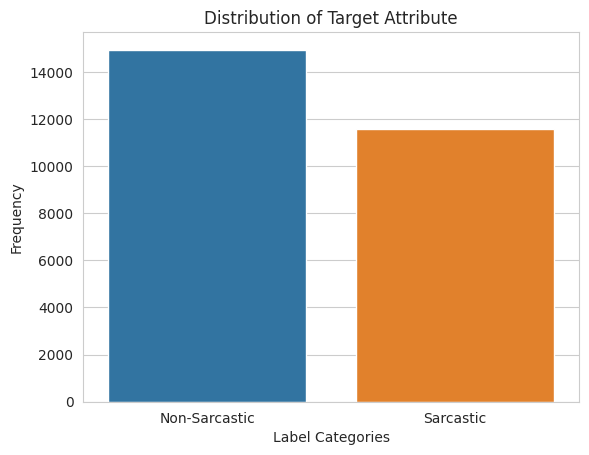

In [12]:
## checking the count of sarcastic and non sarcastic
sns.set_style("whitegrid")
##plotting the count of sarcastic and non sarcastic, and renaming the labels
sns.countplot(x="is_sarcastic", data=df)
sns.set(rc={'figure.figsize':(10,8)})
##Rename the labels
plt.xlabel("Label Categories")
plt.ylabel("Frequency")
plt.title("Distribution of Target Attribute")
plt.show()

In [13]:
## Change Labels with LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["is_sarcastic"] = le.fit_transform(df["is_sarcastic"])

df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [14]:
### Carrying Out Data Cleaning
english_stops = set(stopwords.words('english'))
wn = WordNetLemmatizer()
ps = PorterStemmer()


### data cleaning function

def cleaning(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  tokenized_text = [word for word in tokens if word not in english_stops]
  final_text = [wn.lemmatize(word) for word in tokenized_text]
  return final_text

df["clean_headlines"] = df["headline"].map(lambda x: cleaning(x))
print(df.columns)
df.head( )


Index(['headline', 'is_sarcastic', 'clean_headlines'], dtype='object')


,headline,is_sarcastic,clean_headlines
0,former versace store clerk sues over secret 'b...,0,"[former, versace, store, clerk, sue, secret, b..."
1,the 'roseanne' revival catches up to our thorn...,0,"[roseanne, revival, catch, thorny, political, ..."
2,mom starting to fear son's web series closest ...,1,"[mom, starting, fear, son, web, series, closes..."
3,"boehner just wants wife to listen, not come up...",1,"[boehner, want, wife, listen, come, alternativ..."
4,j.k. rowling wishes snape happy birthday in th...,0,"[jk, rowling, wish, snape, happy, birthday, ma..."


### Continuation

In [23]:
### Split data into training and texting sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["clean_headlines"], df["is_sarcastic"], test_size=0.2, random_state=42)


In [24]:
### Saving Splitted Data
X_train.to_csv("X_train.csv", index=False, header=True)
X_test.to_csv("X_test.csv", index=False, header=True)
y_train.to_csv("y_train.csv", index=False, header=True)
y_test.to_csv("y_test.csv", index=False, header=True)

###Build a baseline model with Random Forest Classifier with TF-IDF

In [25]:
### Import Data
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
X_train.head()

,clean_headlines
0,"['trophy', 'son', 'half', 'father', 'age']"
1,"['joe', 'arpaios', 'concentration', 'camp', 'f..."
2,"['political', 'cartoonist', 'wife', 'find', 'd..."
3,"['clinton', 'fumble', 'submarine', 'control', ..."
4,"['401k', 'enrollment', 'form', 'sits', 'bottom..."


In [26]:
### Initialize TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

### Fit the TF-IDF on the training data
tfidf_vector = TfidfVectorizer()
fitted_tfidf_vect = tfidf_vector.fit(X_train["clean_headlines"])

### Transform train and test data with the fitted TF-IDF
X_train_tfidf = fitted_tfidf_vect.transform(X_train["clean_headlines"])
X_test_tfidf = fitted_tfidf_vect.transform(X_test["clean_headlines"])

### Convert TF-IDF into DataFrame
X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(),
                             columns=tfidf_vector.get_feature_names_out())
X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(),
                            columns=tfidf_vector.get_feature_names_out())
### Rename the columns
X_train_tfidf = X_train_tfidf.rename(str, axis=1)
X_test_tfidf = X_test_tfidf.rename(str, axis=1)
y_train.head()

,is_sarcastic
0,1
1,0
2,1
3,1
4,1


In [27]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.0 MB/s eta 0:00:00


In [28]:
# ### Grid Search CV with Cross-Validation For CatBoost

# from sklearn.model_selection import GridSearchCV
# from catboost import CatBoostClassifier

# # Define the CatBoost classifier
# catboost = CatBoostClassifier(iterations=150, depth=None, verbose=0)

# # Parameters grid for Grid Search
# param_grid = {
#     'learning_rate': [0.1, 0.2, 0.3],
#     'depth': [4, 6, 8],
#     'iterations': [100, 150, 200]
# }

# # Perform Grid Search with Cross-Validation (5 folds)
# grid_search = GridSearchCV(estimator=catboost,
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='roc_auc')
# grid_result = grid_search.fit(X_train_tfidf, y_train.values.ravel(), verbose=0)

# # Get the best parameters and the best score
# best_params = grid_result.best_params_
# best_score = grid_result.best_score_

# print("Best Parameters:", best_params)
# print("Best ROC AUC Score:", best_score)


In [29]:
## CatBoost
## Import Libraries
from sklearn.metrics import precision_recall_fscore_support as score
from catboost import CatBoostClassifier
import time

# Initialize and fit CATBoost Classifier
catboost = CatBoostClassifier(iterations=300, depth=11, verbose=0, learning_rate=0.3)
start = time.time()
catboost.fit(X_train_tfidf, y_train.values.ravel())
end = time.time()
fit_time = (end - start)

# Make Predictions
y_pred_catboost = catboost.predict(X_test_tfidf)

# Calculate Predict Time
start = time.time()
## Keep probabilities for positive class only
y_pred_proba_catboost = catboost.predict_proba(X_test_tfidf)[:, 1]
end = time.time()
pred_time = (end - start)

# Performance Metrics for CATBoost
precision_catboost, recall_catboost, fscore_catboost, support_catboost = score(y_test, y_pred_catboost,
                                                                               average="binary")
accuracy_catboost = (y_pred_catboost == y_test["is_sarcastic"]).sum() / len(y_pred_catboost)
print("Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}".format(
    round(fit_time, 3),
    round(pred_time, 3),
    round(precision_catboost, 3),
    round(recall_catboost, 3),
    round(accuracy_catboost, 3)))


Fit time: 1486.344 / Predict time: 0.539 ---- Precision: 0.776 / Recall: 0.656 / Accuracy: 0.77


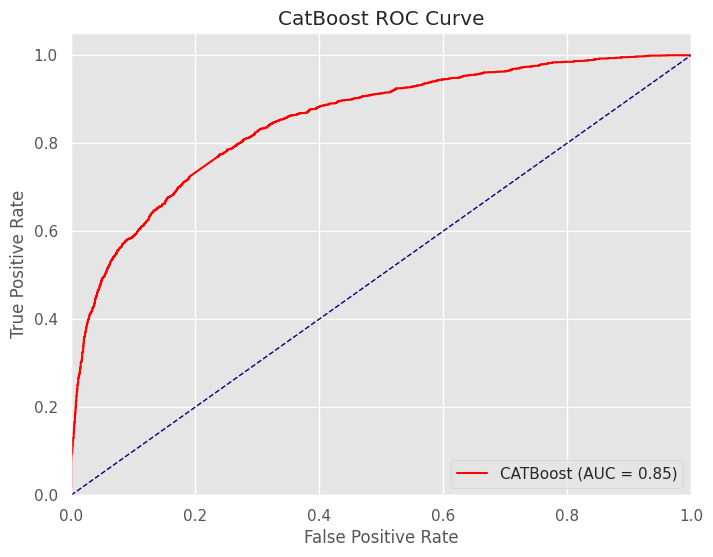

In [30]:
## Import Libraries
plt.style.use("ggplot")
from sklearn.metrics import roc_curve, auc
# ROC Curve for CATBoost
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, y_pred_proba_catboost)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

# Plot ROC Curve for each model
plt.figure(figsize=(8, 6))
plt.plot(fpr_catboost,
         tpr_catboost,
         color='red',
         label='CATBoost (AUC = %0.2f)' % roc_auc_catboost)

plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=1,
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [31]:
# ### Grid Search CV with Cross-Validation For XGBoost
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define the XGBoost classifier
# xgb_model = xgb.XGBClassifier()

# # Parameters grid for Grid Search
# param_grid = {
#     'learning_rate': [0.1, 0.2, 0.3],
#     'max_depth': [3, 4, 5],
#     'n_estimators': [100, 150, 200]
# }

# # Perform Grid Search with Cross-Validation (5 folds)
# grid_search = GridSearchCV(estimator=xgb_model,
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='roc_auc')
# grid_result = grid_search.fit(X_train_tfidf,
#                               y_train.values.ravel())

# # Get the best parameters and the best score
# best_params = grid_result.best_params_
# best_score = grid_result.best_score_

# print("Best Parameters:", best_params)
# print("Best ROC AUC Score:", best_score)


In [32]:
# Extreme Gradient Boosting
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import time

# Initialize and fit XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=400,
                              max_depth=15,
                              learning_rate=0.3)
start = time.time()
xgb_model.fit(X_train_tfidf, y_train.values.ravel())
end = time.time()
fit_time = (end - start)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Calculate Predict Time
start = time.time()
y_pred_proba_xgb = xgb_model.predict_proba(X_test_tfidf)[:, 1]
end = time.time()
pred_time = (end - start)

# Performance Metrics for XGBoost
precision_xgb, recall_xgb, fscore_xgb, support_xgb = score(y_test,
                                                           y_pred_xgb,
                                                           average="binary")
accuracy_xgb = (y_pred_xgb == y_test["is_sarcastic"]).sum() / len(y_pred_xgb)
print("Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}".format(round(fit_time, 3),
                                                                                              round(pred_time, 3),
                                                                                              round(precision_xgb, 3),
                                                                                              round(recall_xgb, 3),
                                                                                              round(accuracy_xgb, 3)))



Fit time: 1124.035 / Predict time: 9.141 ---- Precision: 0.772 / Recall: 0.661 / Accuracy: 0.769


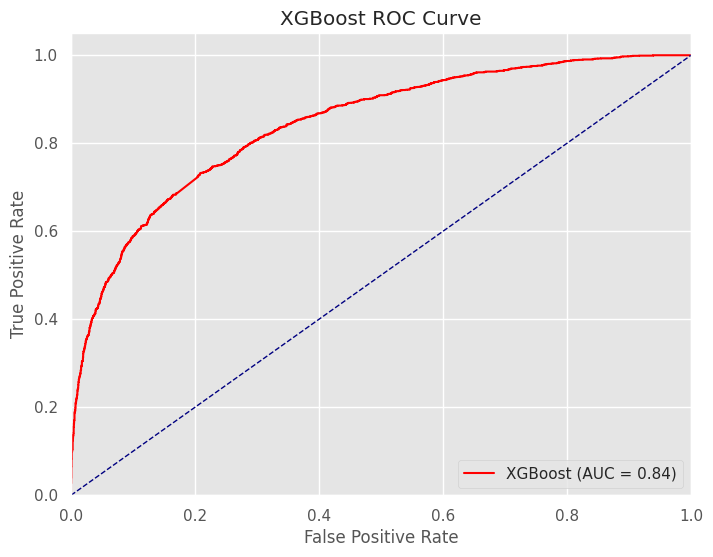

In [33]:
# ROC Curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test,
                                             y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb,
                  tpr_xgb)

# Plot ROC Curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb,
         tpr_xgb,
         color = "red",
         label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)

plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=1,
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right");

In [34]:
# ### Grid Search CV with Cross-Validation For Random Forest
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define the Random Forest classifier
# rf_model = RandomForestClassifier()

# # Parameters grid for Grid Search
# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Perform Grid Search with Cross-Validation (5 folds)
# grid_search = GridSearchCV(estimator=rf_model,
#                            param_grid=param_grid,
#                            cv=5, scoring='roc_auc',
#                            verbose=0,
#                            n_jobs=-1)
# grid_result = grid_search.fit(X_train_tfidf,
#                               y_train.values.ravel())

# # Get the best parameters and the best score
# best_params = grid_result.best_params_
# best_score = grid_result.best_score_

# print("Best Parameters:", best_params)
# print("Best ROC AUC Score:", best_score)


In [35]:

## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Initialize and fit Random Forest Classifier
rf_model = RandomForestClassifier(n_jobs=-1)
start = time.time()
rf_model.fit(X_train_tfidf, y_train.values.ravel())
end = time.time()
fit_time = (end - start)

# Make Predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Calculate Predict Time
start = time.time()
y_pred_proba_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]
end = time.time()
pred_time = (end - start)

# Performance Metrics for Random Forest
precision_rf, recall_rf, fscore_rf, support_rf = score(y_test, y_pred_rf, average="binary")
accuracy_rf = (y_pred_rf == y_test["is_sarcastic"]).sum() / len(y_pred_rf)
print("Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}".format(
    round(fit_time, 3), round(pred_time, 3), round(precision_rf, 3), round(recall_rf, 3), round(accuracy_rf, 3)))



Fit time: 399.917 / Predict time: 5.148 ---- Precision: 0.796 / Recall: 0.62 / Accuracy: 0.768


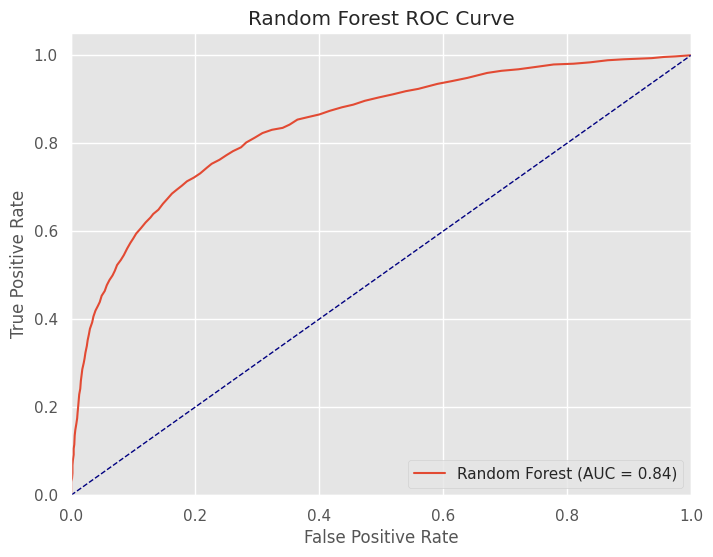

In [36]:
# ROC Curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()


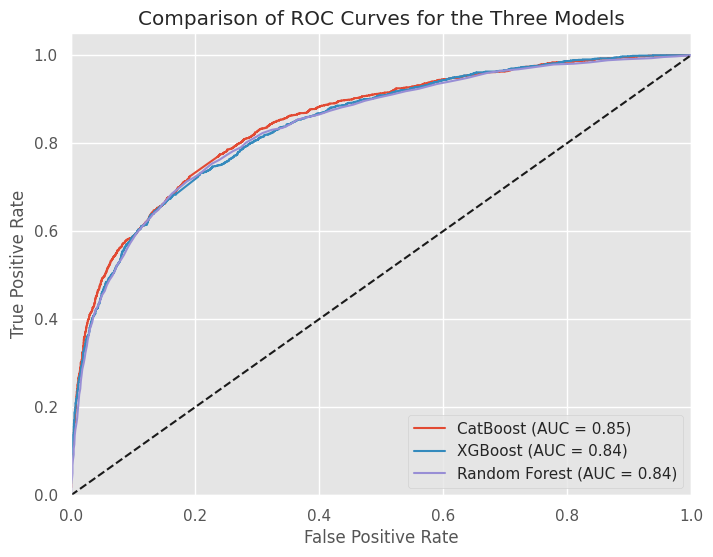

In [37]:
# Plot ROC Curves for all three models
plt.figure(figsize=(8, 6))
plt.plot(fpr_catboost, tpr_catboost, label='CatBoost (AUC = %0.2f)' % roc_auc_catboost)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], 'k--')  # Random ROC curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');
plt.title('Comparison of ROC Curves for the Three Models')
plt.legend(loc="lower right")
plt.show()